## Demo

This demo test Atrous ResNet50 and SegNet models in some images and you can try your own

In [6]:
import sys
sys.path.insert(0, 'models/')

In [32]:
import keras
import numpy as np
import json
from utilities import i_over_u , load_image
from models.FCN import AtrousFCN_Resnet50_16s

In [8]:
import matplotlib.pyplot as plt

In [ ]:
from models.SegNet import seg_net

In [9]:
atrous_resnet50_model = AtrousFCN_Resnet50_16s(input_shape=(256,256,3) , classes=47)
atrous_resnet50_model.compile(loss='categorical_crossentropy' ,optimizer='sgd',metrics=['accuracy' , i_over_u])
atrous_resnet50_model.load_weights('weights/moda_dataset_weights/weights.04-0.37atrous_resnet50_last.hdf5')

In [26]:
segnet_model = seg_net((256, 256, 3))
segnet_model.compile(loss='categorical_crossentropy' ,optimizer='sgd',metrics=['accuracy' , i_over_u ])
segnet_model.load_weights('weights/moda_dataset_weights/weights.04-0.50segnet.hdf5')

In [35]:
with open('label_descriptions.json') as json_f:
    look_up_classes = json.load(json_f)    
    categories = look_up_classes["categories"]

In [39]:
def get_classes(prediction, categories):
    classes = []
    unique_values = np.unique(prediction)
    unique_values = unique_values[unique_values != 0]
    for value in unique_values:
        classes.append(categories[value-1]['name'])
    return classes

In [47]:
#Lets try with Dua Lipa! but you can change this image and try your own
image = load_image('images/image2.jpg')

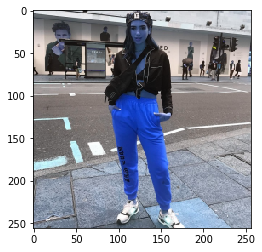

In [48]:
plt.imshow(image)

In [49]:
batch = np.zeros((1,256,256,3))
batch[0] = image
prediction = atrous_resnet50_model.predict(batch)
prediction = prediction[0].argmax(-1)
get_classes(prediction , categories)

['top, t-shirt, sweatshirt', 'jacket', 'pants', 'belt', 'shoe', 'bag, wallet']

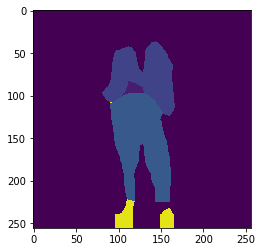

In [53]:
plt.imshow(prediction)

In [54]:
prediction_segnet = segnet_model.predict(batch)
prediction_segnet = prediction_segnet[0].argmax(-1)
get_classes(prediction_segnet , categories)

['top, t-shirt, sweatshirt', 'jacket', 'pants', 'shorts', 'shoe']

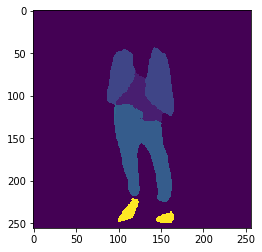

In [55]:
plt.imshow(prediction_segnet)